In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-small-wide-dataset/target.csv
/kaggle/input/stock-market-small-wide-dataset/quote-S.csv
/kaggle/input/stock-market-small-wide-dataset/quote.csv
/kaggle/input/stock-market-small-wide-dataset/bar-S.csv
/kaggle/input/stock-market-small-wide-dataset/bar.csv
/kaggle/input/stock-market-small-wide-dataset/news.csv
/kaggle/input/stock-market-small-wide-dataset/rating.csv
/kaggle/input/stock-market-small-wide-dataset/event.csv


Use only Bar-S and Quote-S datasets. Do not consider any single stock or day for any analysis. A day means no specific day, generalize it. Split a day in a 10 minutes window, like 30 windows in 5 hours of any day. Expected to finish the 8 tasks in 3 days, maximum 5 days.

##### Instead of price, consider return to get clusters N2. Use the quote dataset. Value of N2?
##### cumulative bid_size in a day and compare with volume from bar dataset. Make the average of all stocks in any cluster. Show for all clusters of N1. 
##### Optimize N1, by ARIMA, GARCH and LSTM accuracy. Can you identify a stock from user input in which cluster?

In [2]:
bar_s = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/bar-S.csv")
quote_s = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/quote-S.csv")

In [3]:
bar_s

,time,symbol,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-09-11 21:41:00+00:00,GOOGL,174,79270,1515.5786,1515.720,1515.720,1515.720,1515.720,1519.4544,1599860460000,1599860520000
1,2020-09-11 21:27:00+00:00,AAPL,100,3503661,111.9790,111.979,111.979,111.979,111.979,111.8497,1599859620000,1599859680000
2,2020-09-11 21:21:00+00:00,AAPL,100,3503561,111.8410,111.841,111.841,111.841,111.841,111.8497,1599859260000,1599859320000
3,2020-09-11 21:16:00+00:00,AAPL,368,3503461,111.8932,111.901,111.901,111.884,111.884,111.8497,1599858960000,1599859020000
4,2020-09-11 21:07:00+00:00,AAPL,100,3503093,112.0010,112.001,112.001,112.001,112.001,111.8497,1599858420000,1599858480000
...,...,...,...,...,...,...,...,...,...,...,...,...
381590,2020-08-03 14:46:00+00:00,AON,400,31618,203.8500,203.850,203.850,203.850,203.850,204.6909,1596465960000,1596466020000
381591,2020-08-03 14:46:00+00:00,SNA,400,19194,141.3825,141.445,141.445,141.320,141.320,142.6549,1596465960000,1596466020000
381592,2020-08-03 14:46:00+00:00,DLR,400,53348,160.3400,160.375,160.375,160.305,160.305,160.8408,1596465960000,1596466020000
381593,2020-08-03 14:46:00+00:00,GPC,400,8580,91.1325,91.175,91.175,91.090,91.090,90.8993,1596465960000,1596466020000


In [4]:
quote_s

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-09-11 19:59:59+00:00,QRVO,122.82,7,123.25,8
1,2020-09-11 19:59:15+00:00,FIS,144.14,7,144.64,5
2,2020-09-11 19:59:10+00:00,GRMN,100.00,6,100.13,6
3,2020-09-11 19:47:08+00:00,V,200.82,6,201.23,8
4,2020-09-11 19:47:00+00:00,V,200.74,5,201.23,8
...,...,...,...,...,...,...
68836,2020-08-04 18:55:04+00:00,AXP,92.76,5,92.97,5
68837,2020-08-04 18:54:18+00:00,AXP,92.73,5,92.96,5
68838,2020-08-04 18:54:17+00:00,AXP,92.70,5,92.96,5
68839,2020-08-04 18:52:47+00:00,AXP,92.67,5,92.91,5


In [5]:
bar_s['average_price'].nunique()

334592

In [6]:
X = bar_s[['average_price']]

In [7]:
X

,average_price
0,1519.4544
1,111.8497
2,111.8497
3,111.8497
4,111.8497
...,...
381590,204.6909
381591,142.6549
381592,160.8408
381593,90.8993


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)

In [9]:
kmeans.fit(X)

KMeans(n_clusters=10)

In [10]:
#kmeans.cluster_centers_

##### Make clusters (N1) based on ticker/symbol and price for bar. Value of N1?
# **VALUS OF N1 ARE VALUES OF CENTROIDS
# CLUSTER OF PRICE AND SYMBOL FOR BAR DATASET**

IndexError: index 1 is out of bounds for axis 1 with size 1

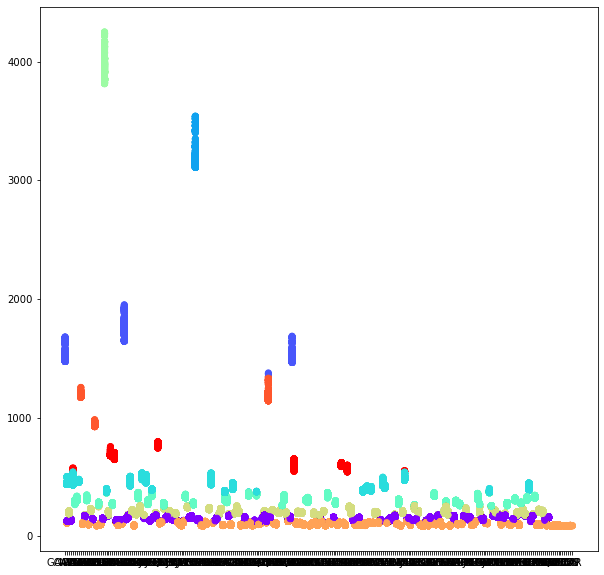

In [11]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (10,10))
centroids = np.array(kmeans.cluster_centers_)
pred = kmeans.predict(X)
plt.scatter(bar_s['symbol'],X, c = pred, cmap ="rainbow")
plt.scatter(centroids[:,0],centroids[:,1],s=100,marker='x')
plt.show()

In [12]:
centroids

array([[ 150.30775667],
       [1561.33895049],
       [3184.24170078],
       [ 437.24437998],
       [ 307.27414851],
       [3961.03879283],
       [ 208.51837791],
       [ 105.22316132],
       [1136.3846565 ],
       [ 649.78421802]])

In [13]:
bar_s['symbol'].nunique()

258

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, max_iter=1000)
pipeline = make_pipeline(normalizer,kmeans)

In [15]:
quote = pd.read_csv("/kaggle/input/stock-market-small-wide-dataset/quote.csv")

In [16]:
quote

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-05 21:57:02+00:00,BDX,284.24,1,283.97,1
1,2020-08-05 20:59:07+00:00,COST,343.60,1,358.23,1
2,2020-08-05 20:58:46+00:00,COST,345.76,2,358.23,1
3,2020-08-05 20:58:25+00:00,COST,345.76,1,358.23,1
4,2020-08-05 20:58:15+00:00,BA,173.30,1,180.63,1
...,...,...,...,...,...,...
2158859,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.92,30
2158860,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.85,16
2158861,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.98,18
2158862,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.95,14


In [17]:
!pip install kmodes

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [18]:
import kmodes

In [19]:
from kmodes.kmodes import KModes

In [20]:
clus = bar_s[['symbol','close_price']]

In [21]:
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clus)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 736637.0


##### list out the stocks, cluster wise. Consider N1 only.
# ****MAKING CLUSTER OF STOCKS 
# AS SYMBOL ARE NON-NUMERICAL VALUES, SO TO CLUSTER THEM USING KMODES

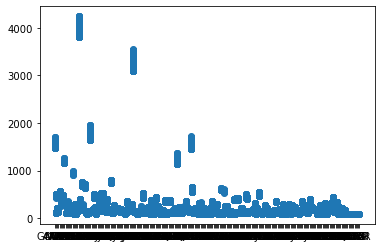

In [22]:

plt.scatter(bar_s['symbol'],bar_s['close_price'], cmap = "rainbow")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
le.fit(bar_s['symbol'])

LabelEncoder()

In [25]:
int_symbol = le.transform(bar_s['symbol'])

In [26]:
X1 = pd.DataFrame(data = (int_symbol,bar_s['close_price']))
X1 = X1.T
kmeans1 = KMeans(n_clusters = 20)
kmeans1.fit(X1)

KMeans(n_clusters=20)

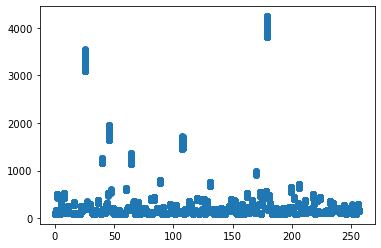

In [27]:
plt.scatter(X1.iloc[ : ,0:1],X1.iloc[ : ,1:2], cmap ="rainbow")
plt.show()

In [28]:
y = quote_s[['ticker','bid_size']]

In [29]:
km_cao1 = KModes(n_clusters=20, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao1 = km_cao1.fit_predict(y)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2104, cost: 32794.0


# ##### N3, cluster based on bid_size and  ticker/symbol. How bid_size in each cluster of N3 is distributed in a day? 
# 

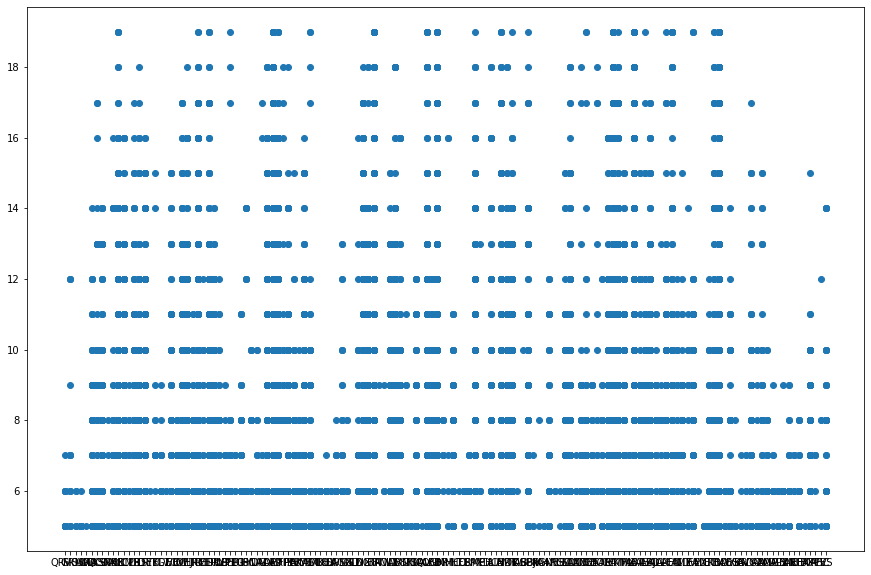

In [30]:
figure(figsize = (15,10))
plt.scatter(y['ticker'],y['bid_size'], cmap = "rainbow")
plt.show()

In [31]:
quote_s['price_change'] = quote_s['ask_price'] - quote_s['bid_price']

##### how the price change and size is distributed? bid only from the quote dataset.
# **FOR PRICE CHANGE USING DIFFERENCE OF ASK PRICE AND BID PRICE**

In [32]:
size_price = quote_s[['bid_size','price_change']]

In [33]:
kmeans.fit(size_price)

KMeans(max_iter=1000, n_clusters=10)

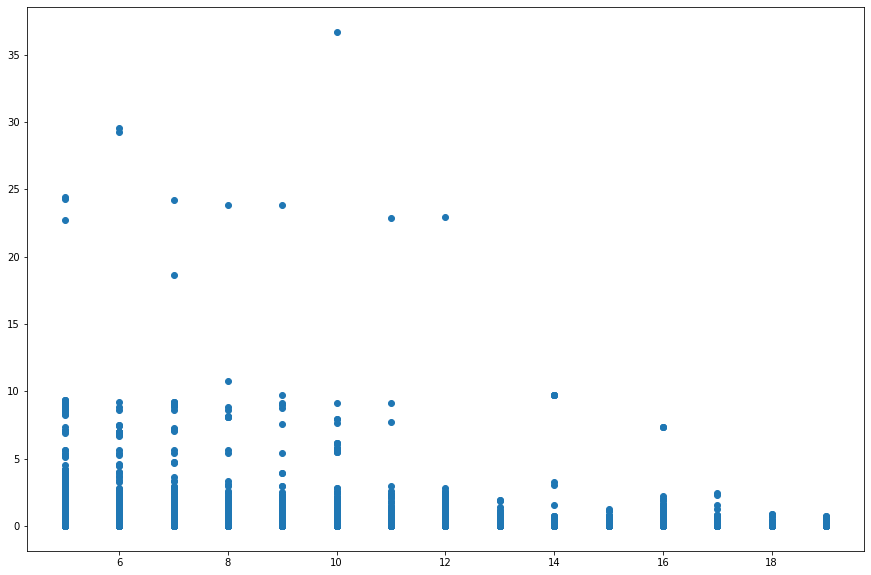

In [34]:
figure(figsize = (15,10))
plt.scatter(size_price.iloc[ : ,0:1],size_price.iloc[ : ,1:2])
plt.show()

In [35]:
import datetime

In [36]:
#grouping each day
bar_s = bar_s.groupby(['time']).sum().reset_index()

In [37]:
bar_s

,time,volume,accumulated_volume,VWAP,open_price,high_price,low_price,close_price,average_price,epoch_time_at_the_beginning,epoch_time_at_the_ending
0,2020-08-03 14:46:00+00:00,38688,4689107,28291.8518,28293.375,28294.600,28289.590,28290.520,28337.4632,169225391760000,169225398120000
1,2020-08-03 14:47:00+00:00,38942,5105349,24917.9210,24919.416,24921.005,24916.635,24917.780,24953.7834,170821864140000,170821870560000
2,2020-08-03 14:48:00+00:00,34705,4532665,29438.3247,29439.285,29440.210,29436.565,29437.760,29490.4999,164436006240000,164436012420000
3,2020-08-03 14:49:00+00:00,43995,4991105,30397.9466,30396.235,30398.695,30393.770,30396.330,30477.9194,193172402940000,193172410200000
4,2020-08-03 14:50:00+00:00,40100,4888544,27053.1278,27052.659,27055.019,27051.239,27053.759,27106.7932,181997146800000,181997153640000
...,...,...,...,...,...,...,...,...,...,...,...
4478,2020-09-11 21:07:00+00:00,100,3503093,112.0010,112.001,112.001,112.001,112.001,111.8497,1599858420000,1599858480000
4479,2020-09-11 21:16:00+00:00,368,3503461,111.8932,111.901,111.901,111.884,111.884,111.8497,1599858960000,1599859020000
4480,2020-09-11 21:21:00+00:00,100,3503561,111.8410,111.841,111.841,111.841,111.841,111.8497,1599859260000,1599859320000
4481,2020-09-11 21:27:00+00:00,100,3503661,111.9790,111.979,111.979,111.979,111.979,111.8497,1599859620000,1599859680000


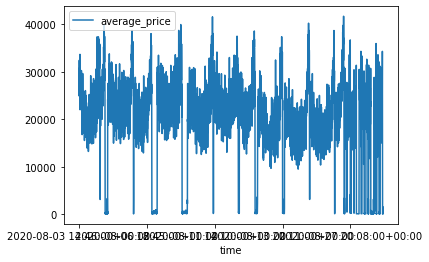

In [38]:
bar_s.plot.line(x = 'time',y = 'average_price')

In [39]:

qoute_s = quote_s.groupby(['time']).sum().reset_index()
quote_s

,time,ticker,bid_price,bid_size,ask_price,ask_size,price_change
0,2020-09-11 19:59:59+00:00,QRVO,122.82,7,123.25,8,0.43
1,2020-09-11 19:59:15+00:00,FIS,144.14,7,144.64,5,0.50
2,2020-09-11 19:59:10+00:00,GRMN,100.00,6,100.13,6,0.13
3,2020-09-11 19:47:08+00:00,V,200.82,6,201.23,8,0.41
4,2020-09-11 19:47:00+00:00,V,200.74,5,201.23,8,0.49
...,...,...,...,...,...,...,...
68836,2020-08-04 18:55:04+00:00,AXP,92.76,5,92.97,5,0.21
68837,2020-08-04 18:54:18+00:00,AXP,92.73,5,92.96,5,0.23
68838,2020-08-04 18:54:17+00:00,AXP,92.70,5,92.96,5,0.26
68839,2020-08-04 18:52:47+00:00,AXP,92.67,5,92.91,5,0.24


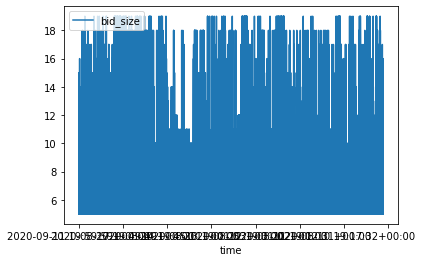

In [40]:
quote_s.plot.line(x = 'time',y = 'bid_size')

##### how volatility and size are distributed across a day? Bid only from the quote dataset.
# **FIRSTLY GROUP DATASET ACCORDING TO EACH DAY THEN MAKE CLUSTER THAT HOW SIZE ARE DISTRIBUTED ACROSS A DAY.**

In [41]:
z = quote_s[['time','bid_size']]

In [42]:
fitClusters_cao2 = km_cao.fit_predict(z)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8164, cost: 82934.0


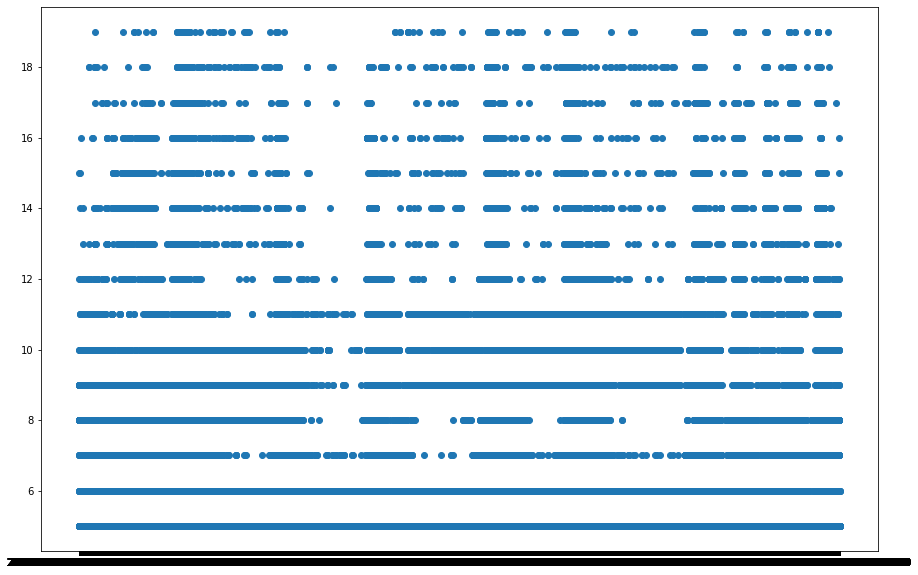

In [43]:
figure(figsize = (15,10))
plt.scatter(z['time'],z['bid_size'], cmap = "rainbow")
plt.show()